# Análise Pós-Transformação dos Dados de Livros

Este notebook explora os dados após a aplicação da pipeline de transformação, analisando:
- As features criadas pela pipeline
- Distribuições das novas colunas
- Qualidade dos dados transformados
- Correlações entre features
- Visualizações das principais características

### 1. Importação das Bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")

### 2. Carregamento dos Datasets Transformados

In [ ]:
print("=== Carregamento dos Datasets ===")

# Dataset original (raw)
df_raw = pl.read_csv("../src/data/raw/all_books_with_images.csv")
print(f"Dataset Original: {df_raw.shape}")

# Dataset processado (após limpeza)  
df_processed = pl.read_csv("../src/data/processed/books_processed.csv")
print(f"Dataset Processado: {df_processed.shape}")

# Dataset com features (completo)
df_features = pl.read_csv("../src/data/features/books_features.csv")
print(f"Dataset com Features: {df_features.shape}")

=== Carregamento dos Datasets ===
Dataset Original: (1000, 9)
Dataset Processado: (1000, 10)
Dataset com Features: (1000, 69)


### 3. Visão Geral dos Dados Transformados

In [3]:
print("=== Comparação de Datasets ===")
print(f"Original: {df_raw.height} registros, {len(df_raw.columns)} colunas")
print(f"Processado: {df_processed.height} registros, {len(df_processed.columns)} colunas") 
print(f"Com Features: {df_features.height} registros, {len(df_features.columns)} colunas")
print(f"Features Adicionadas: {len(df_features.columns) - len(df_processed.columns)}")

print("\nINSIGHT: Pipeline criou 59 novas features mantendo todos os registros.")

=== Comparação de Datasets ===
Original: 1000 registros, 9 colunas
Processado: 1000 registros, 10 colunas
Com Features: 1000 registros, 69 colunas
Features Adicionadas: 59

INSIGHT: Pipeline criou 59 novas features mantendo todos os registros.


#### Visualização dos dados transformados

In [4]:
print("=== Primeiras linhas do dataset transformado ===")
df_features.head(3)

=== Primeiras linhas do dataset transformado ===


id,title,price,rating,category,image,product_page,availability,stock,image_base64,price_range,has_subtitle,has_series,starts_with_the,title_length,title_word_count,has_numbers,rating_category,stock_level,popularity_score,category_academic,category_adult_fiction,category_art,category_autobiography,category_biography,category_business,category_childrens,category_christian,category_christian_fiction,category_classics,category_contemporary,category_crime,category_cultural,category_erotica,category_fantasy,category_fiction,category_food_and_drink,category_health,category_historical,category_historical_fiction,category_history,category_horror,category_humor,category_music,category_mystery,category_new_adult,category_nonfiction,category_novels,category_outros,category_paranormal,category_parenting,category_philosophy,category_poetry,category_politics,category_psychology,category_religion,category_romance,category_science,category_science_fiction,category_self_help,category_sequential_art,category_short_stories,category_spirituality,category_sports_and_games,category_suspense,category_thriller,category_travel,category_womens_fiction,category_young_adult
str,str,f64,i64,str,str,str,i64,i64,str,str,bool,bool,bool,i64,i64,bool,str,str,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""book_53731879""","""It's Only the Himalayas""",45.17,2,"""Travel""","""https://books.toscrape.com/med…","""https://books.toscrape.com/cat…",1,19,"""/9j/4AAQSkZJRgABAQAAAQABAAD/2w…","""Alto""",false,false,false,23,4,false,"""Baixo""","""Alto""",0.539091,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
"""book_0cf218f4""","""Full Moon over Noah’s Ark: An …",49.43,4,"""Travel""","""https://books.toscrape.com/med…","""https://books.toscrape.com/cat…",1,15,"""/9j/4AAQSkZJRgABAQAAAQABAAD/2w…","""Alto""",true,false,false,64,12,false,"""Alto""","""Médio""",0.764545,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
"""book_88fd956f""","""See America: A Celebration of …",48.87,3,"""Travel""","""https://books.toscrape.com/med…","""https://books.toscrape.com/cat…",1,14,"""/9j/4AAQSkZJRgABAQAAAQABAAD/2w…","""Alto""",true,false,false,66,11,false,"""Médio""","""Médio""",0.610909,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [5]:
print("=== Tipos de dados das colunas ===")
for col in df_features.columns:
    print(f"{col}: {df_features[col].dtype}")
print(f"\nTotal de {len(df_features.columns)} colunas no dataset transformado")

=== Tipos de dados das colunas ===
id: String
title: String
price: Float64
rating: Int64
category: String
image: String
product_page: String
availability: Int64
stock: Int64
image_base64: String
price_range: String
has_subtitle: Boolean
has_series: Boolean
starts_with_the: Boolean
title_length: Int64
title_word_count: Int64
has_numbers: Boolean
rating_category: String
stock_level: String
popularity_score: Float64
category_academic: Int64
category_adult_fiction: Int64
category_art: Int64
category_autobiography: Int64
category_biography: Int64
category_business: Int64
category_childrens: Int64
category_christian: Int64
category_christian_fiction: Int64
category_classics: Int64
category_contemporary: Int64
category_crime: Int64
category_cultural: Int64
category_erotica: Int64
category_fantasy: Int64
category_fiction: Int64
category_food_and_drink: Int64
category_health: Int64
category_historical: Int64
category_historical_fiction: Int64
category_history: Int64
category_horror: Int64
categ

## 4. Análise das Colunas e Features Criadas

In [6]:
print("=== Identificação das Features Criadas ===")

# Colunas base (originais)
colunas_base = ['id', 'title', 'price', 'rating', 'category', 'image', 'product_page', 'availability', 'stock', 'image_base64']
colunas_features = [col for col in df_features.columns if col not in colunas_base]

print(f"Colunas Base: {len(colunas_base)}")
print(f"Features Criadas: {len(colunas_features)}")
print(f"Total: {len(df_features.columns)} colunas")

=== Identificação das Features Criadas ===
Colunas Base: 10
Features Criadas: 59
Total: 69 colunas


In [7]:
print("=== Classificação das Features por Categoria ===")

# Features de preço
features_price = [col for col in colunas_features if 'price' in col]
print(f"Features de Preço: {len(features_price)}")
for feature in features_price:
    print(f"  - {feature}")

# Features de título
features_title = [col for col in colunas_features if any(x in col for x in ['title', 'subtitle', 'series', 'the', 'word', 'length', 'numbers'])]
print(f"\nFeatures de Título: {len(features_title)}")
for feature in features_title:
    print(f"  - {feature}")

=== Classificação das Features por Categoria ===
Features de Preço: 1
  - price_range

Features de Título: 6
  - has_subtitle
  - has_series
  - starts_with_the
  - title_length
  - title_word_count
  - has_numbers


In [8]:
print("=== Features de Rating e Stock ===")

# Features de rating
features_rating = [col for col in colunas_features if 'rating' in col]
print(f"Features de Rating: {len(features_rating)}")
for feature in features_rating:
    print(f"  - {feature}")

# Features de stock
features_stock = [col for col in colunas_features if 'stock' in col]
print(f"\nFeatures de Stock: {len(features_stock)}")
for feature in features_stock:
    print(f"  - {feature}")

# Feature de popularidade
features_other = [col for col in colunas_features if 'popularity' in col]
print(f"\nOutras Features: {len(features_other)}")
for feature in features_other:
    print(f"  - {feature}")

=== Features de Rating e Stock ===
Features de Rating: 1
  - rating_category

Features de Stock: 1
  - stock_level

Outras Features: 1
  - popularity_score


In [9]:
print("=== Análise das Features de Categoria (One-Hot Encoding) ===")

# Features de categoria (one-hot encoded)
features_categories = [col for col in colunas_features if col.startswith('category_')]
print(f"Total de Features de Categoria: {len(features_categories)}")
print(f"Primeiras 10 categorias:")
for cat in features_categories[:10]:
    valor_categoria = cat.replace('category_', '')
    total_livros = df_features[cat].sum()
    print(f"  - {valor_categoria}: {total_livros} livros")

if len(features_categories) > 10:
    print(f"  ... e mais {len(features_categories) - 10} categorias")

=== Análise das Features de Categoria (One-Hot Encoding) ===
Total de Features de Categoria: 49
Primeiras 10 categorias:
  - academic: 1 livros
  - adult_fiction: 1 livros
  - art: 8 livros
  - autobiography: 9 livros
  - biography: 5 livros
  - business: 12 livros
  - childrens: 29 livros
  - christian: 3 livros
  - christian_fiction: 6 livros
  - classics: 19 livros
  ... e mais 39 categorias


### 5. Distribuição das Features Criadas

In [10]:
print("=== Estatísticas Descritivas das Features de Preço ===")

# Análise das features de preço
price_features = [col for col in df_features.columns if 'price' in col.lower()]
print(f"Analisando {len(price_features)} features de preço:")
for feature in price_features:
    print(f"  - {feature}")

print("\nDistribuição das faixas de preço:")
price_range_counts = df_features['price_range'].value_counts().sort('count', descending=True)
for row in price_range_counts.iter_rows():
    faixa, count = row
    print(f"  - {faixa}: {count} livros")

print(f"\nEstatísticas do preço numérico:")
price_stats = df_features.select("price").describe()
print(price_stats)

=== Estatísticas Descritivas das Features de Preço ===
Analisando 2 features de preço:
  - price
  - price_range

Distribuição das faixas de preço:
  - Médio: 401 livros
  - Alto: 205 livros
  - Premium: 198 livros
  - Baixo: 196 livros

Estatísticas do preço numérico:
shape: (9, 2)
┌────────────┬──────────┐
│ statistic  ┆ price    │
│ ---        ┆ ---      │
│ str        ┆ f64      │
╞════════════╪══════════╡
│ count      ┆ 1000.0   │
│ null_count ┆ 0.0      │
│ mean       ┆ 35.07035 │
│ std        ┆ 14.44669 │
│ min        ┆ 10.0     │
│ 25%        ┆ 22.11    │
│ 50%        ┆ 36.0     │
│ 75%        ┆ 47.44    │
│ max        ┆ 59.99    │
└────────────┴──────────┘


In [11]:
print("=== Análise das Features de Rating ===")

# Estatísticas das features de rating
print("Features relacionadas a ratings:")
rating_features = [col for col in df_features.columns if 'rating' in col.lower()]
for feature in rating_features:
    print(f"  - {feature}")

print("\nDistribuição das categorias de rating:")
rating_counts = df_features['rating_category'].value_counts().sort('count', descending=True)
for row in rating_counts.iter_rows():
    categoria, count = row
    print(f"  - {categoria}: {count} livros")

print(f"\nEstatísticas do rating numérico:")
rating_stats = df_features.select("rating").describe()
print(rating_stats)

=== Análise das Features de Rating ===
Features relacionadas a ratings:
  - rating
  - rating_category

Distribuição das categorias de rating:
  - Muito Baixo: 226 livros
  - Médio: 203 livros
  - Baixo: 196 livros
  - Muito Alto: 196 livros
  - Alto: 179 livros

Estatísticas do rating numérico:
shape: (9, 2)
┌────────────┬──────────┐
│ statistic  ┆ rating   │
│ ---        ┆ ---      │
│ str        ┆ f64      │
╞════════════╪══════════╡
│ count      ┆ 1000.0   │
│ null_count ┆ 0.0      │
│ mean       ┆ 2.923    │
│ std        ┆ 1.434967 │
│ min        ┆ 1.0      │
│ 25%        ┆ 2.0      │
│ 50%        ┆ 3.0      │
│ 75%        ┆ 4.0      │
│ max        ┆ 5.0      │
└────────────┴──────────┘


In [12]:
print("=== Análise das Features de Título ===")

# Estatísticas das features de título
title_features = [col for col in df_features.columns if 'title' in col.lower()]
print(f"Features relacionadas ao título ({len(title_features)}):")
for feature in title_features:
    print(f"  - {feature}")

print("\nEstatísticas das features numéricas de título:")

print("Comprimento do título:")
title_length_stats = df_features.select("title_length").describe()
print(title_length_stats)

print("\nContagem de palavras no título:")
title_word_count_stats = df_features.select("title_word_count").describe()
print(title_word_count_stats)

=== Análise das Features de Título ===
Features relacionadas ao título (4):
  - title
  - has_subtitle
  - title_length
  - title_word_count

Estatísticas das features numéricas de título:
Comprimento do título:
shape: (9, 2)
┌────────────┬──────────────┐
│ statistic  ┆ title_length │
│ ---        ┆ ---          │
│ str        ┆ f64          │
╞════════════╪══════════════╡
│ count      ┆ 1000.0       │
│ null_count ┆ 0.0          │
│ mean       ┆ 39.097       │
│ std        ┆ 25.752724    │
│ min        ┆ 2.0          │
│ 25%        ┆ 19.0         │
│ 50%        ┆ 35.0         │
│ 75%        ┆ 53.0         │
│ max        ┆ 204.0        │
└────────────┴──────────────┘

Contagem de palavras no título:
shape: (9, 2)
┌────────────┬──────────────────┐
│ statistic  ┆ title_word_count │
│ ---        ┆ ---              │
│ str        ┆ f64              │
╞════════════╪══════════════════╡
│ count      ┆ 1000.0           │
│ null_count ┆ 0.0              │
│ mean       ┆ 6.735            │
│ std

### Visualizações das Features

In [13]:
print("=== Configuração para Visualizações ===")
df_pandas = df_features.to_pandas()

=== Configuração para Visualizações ===


=== Visualização: Distribuição de Faixas de Preço ===


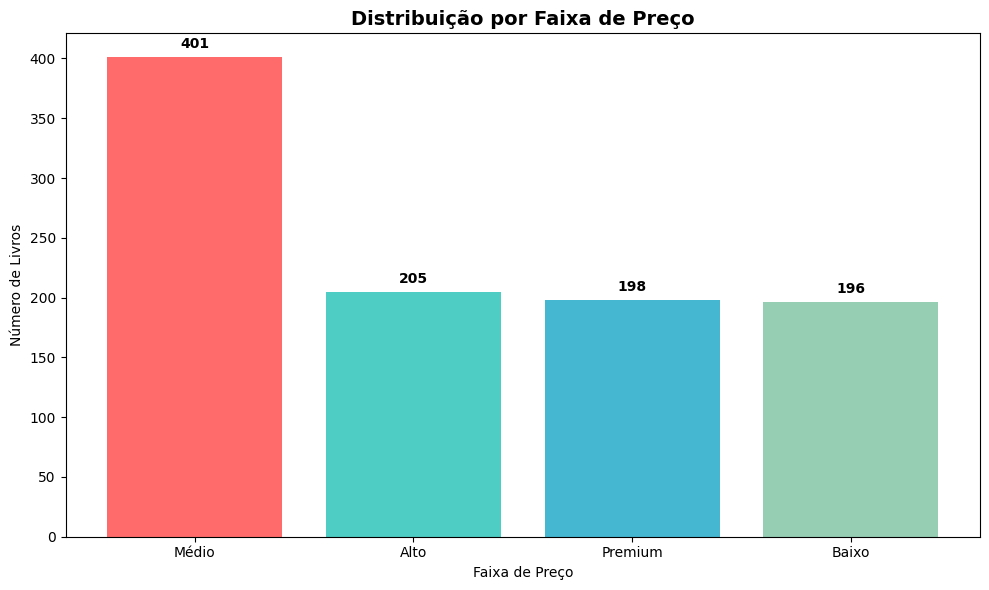

In [14]:
print("=== Visualização: Distribuição de Faixas de Preço ===")

# Criar gráfico para faixas de preço
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Dados para o gráfico
price_range_counts = df_features['price_range'].value_counts().sort('count', descending=True)
categories = price_range_counts['price_range'].to_list()
counts = price_range_counts['count'].to_list()

# Criar gráfico de barras
bars = ax.bar(categories, counts, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
ax.set_title('Distribuição por Faixa de Preço', fontweight='bold', fontsize=14)
ax.set_ylabel('Número de Livros')
ax.set_xlabel('Faixa de Preço')

# Adicionar valores nas barras
for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{count}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

=== Visualização: Distribuição de Categorias de Rating ===


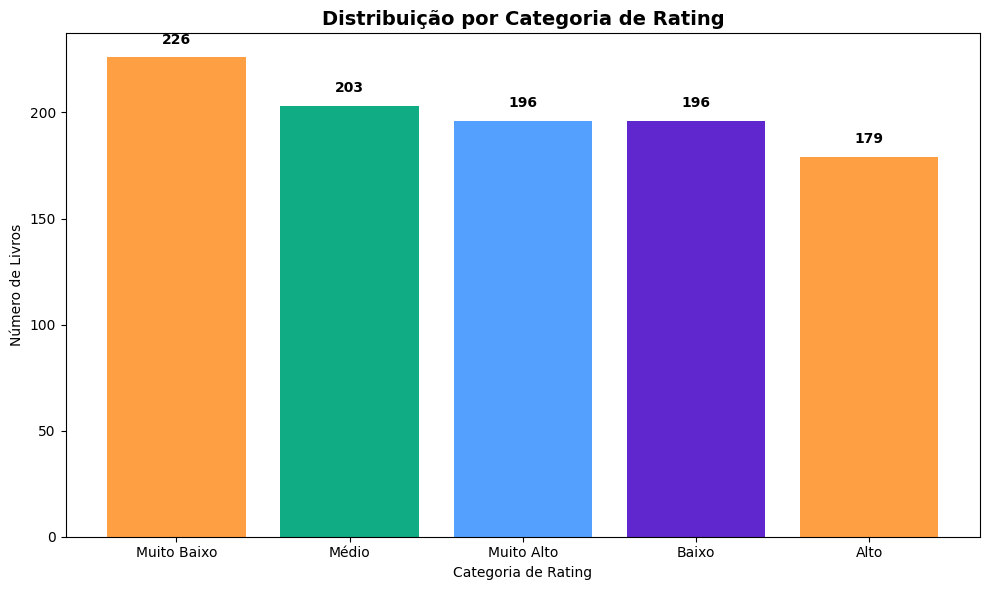

In [15]:
print("=== Visualização: Distribuição de Categorias de Rating ===")

# Criar gráfico para categorias de rating
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Dados para o gráfico
rating_counts = df_features['rating_category'].value_counts().sort('count', descending=True)
rating_cats = rating_counts['rating_category'].to_list()
rating_cnts = rating_counts['count'].to_list()

# Criar gráfico de barras
bars = ax.bar(rating_cats, rating_cnts, color=['#FF9F43', '#10AC84', '#54A0FF', '#5F27CD'])
ax.set_title('Distribuição por Categoria de Rating', fontweight='bold', fontsize=14)
ax.set_ylabel('Número de Livros')
ax.set_xlabel('Categoria de Rating')

# Adicionar valores nas barras
for bar, count in zip(bars, rating_cnts):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{count}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

=== Visualização: Análise das Features de Título ===


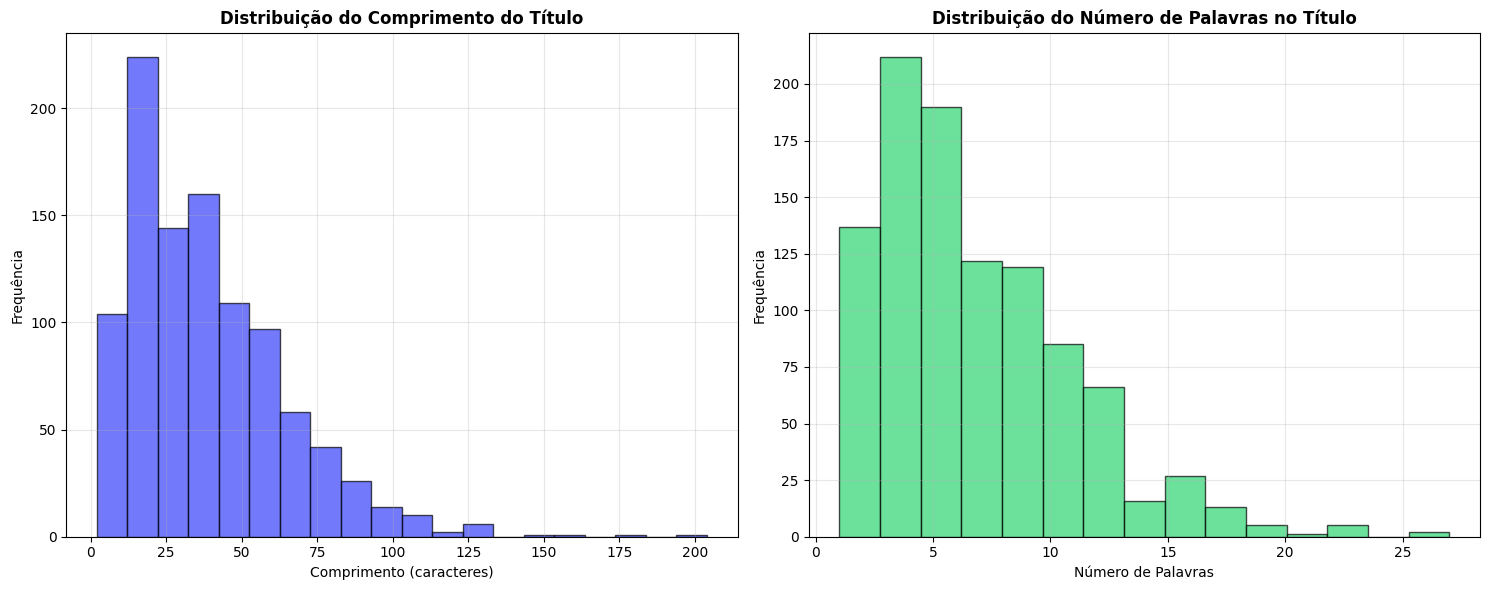

In [16]:
print("=== Visualização: Análise das Features de Título ===")

# Criar subplots para features de título
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histograma do comprimento do título
ax1.hist(df_pandas['title_length'], bins=20, color='#3742FA', alpha=0.7, edgecolor='black')
ax1.set_title('Distribuição do Comprimento do Título', fontweight='bold')
ax1.set_xlabel('Comprimento (caracteres)')
ax1.set_ylabel('Frequência')
ax1.grid(True, alpha=0.3)

# Histograma da contagem de palavras
ax2.hist(df_pandas['title_word_count'], bins=15, color='#2ED573', alpha=0.7, edgecolor='black')
ax2.set_title('Distribuição do Número de Palavras no Título', fontweight='bold')
ax2.set_xlabel('Número de Palavras')
ax2.set_ylabel('Frequência')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Análise de Correlações entre Features

In [17]:
print("=== Preparação dos Dados para Análise de Correlação ===")

# Selecionar apenas features numéricas para correlação
numeric_features = [
    'price', 'rating', 'stock', 'title_length', 'title_word_count', 
    'popularity_score', 'availability'
] + [col for col in df_features.columns if col.startswith('has_') or col.startswith('starts_with_')]

print(f"Features selecionadas para correlação: {len(numeric_features)}")
print("Features principais:")
for i, feature in enumerate(numeric_features[:10], 1):
    print(f"  {i}. {feature}")

if len(numeric_features) > 10:
    print(f"  ... e mais {len(numeric_features) - 10} features")

# Preparar dados para correlação
df_corr = df_features.select(numeric_features).to_pandas()

print(f"\nDataset para correlação: {df_corr.shape}")
print("✅ Dados preparados para análise de correlação")

=== Preparação dos Dados para Análise de Correlação ===
Features selecionadas para correlação: 11
Features principais:
  1. price
  2. rating
  3. stock
  4. title_length
  5. title_word_count
  6. popularity_score
  7. availability
  8. has_subtitle
  9. has_series
  10. starts_with_the
  ... e mais 1 features

Dataset para correlação: (1000, 11)
✅ Dados preparados para análise de correlação


In [18]:
print("=== Conversão de Tipos para Correlação ===")

# Converter booleanos para numéricos
bool_columns = []
for col in df_corr.columns:
    if df_corr[col].dtype == 'bool':
        df_corr[col] = df_corr[col].astype(int)
        bool_columns.append(col)

print(f"Colunas booleanas convertidas: {len(bool_columns)}")
if bool_columns:
    for col in bool_columns[:5]:
        print(f"  - {col}")
    if len(bool_columns) > 5:
        print(f"  ... e mais {len(bool_columns) - 5} colunas")

print(f"\nTipos de dados finais:")
print(df_corr.dtypes.value_counts())

=== Conversão de Tipos para Correlação ===
Colunas booleanas convertidas: 4
  - has_subtitle
  - has_series
  - starts_with_the
  - has_numbers

Tipos de dados finais:
int64      9
float64    2
Name: count, dtype: int64


=== Visualização: Matriz de Correlação ===


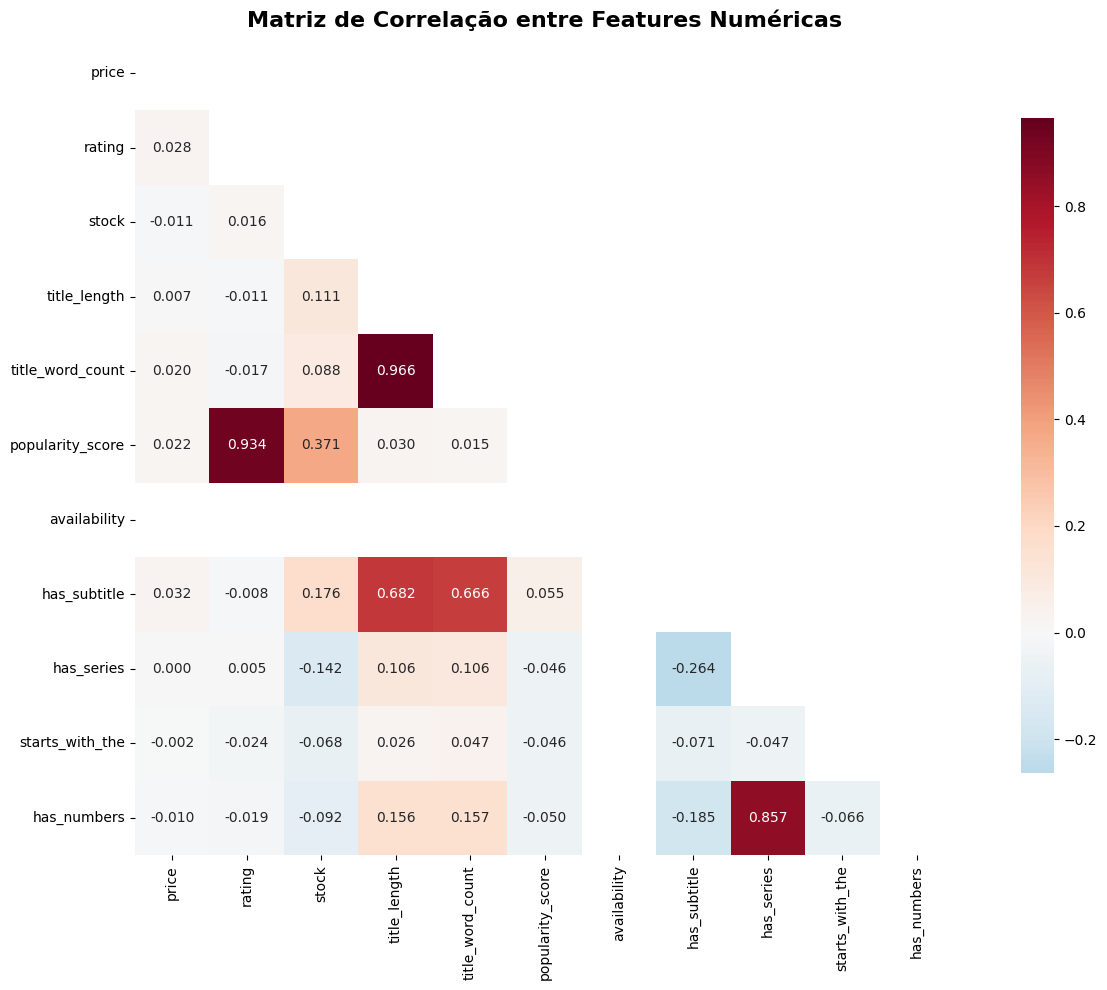

In [19]:
print("=== Visualização: Matriz de Correlação ===")

import numpy as np

# Calcular matriz de correlação
correlation_matrix = df_corr.corr()

# Criar visualização da matriz de correlação
plt.figure(figsize=(14, 10))

# Máscara para mostrar só metade da matriz
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Criar heatmap
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={"shrink": .8})

plt.title('Matriz de Correlação entre Features Numéricas', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

## 📋 Resumo Estatístico das Features

In [20]:
print("=== Estatísticas das Features Numéricas Principais ===")

# Features numéricas principais
key_numeric_features = ['price', 'rating', 'stock', 'title_length', 'title_word_count', 'popularity_score']

stats_df = df_features.select(key_numeric_features).describe()
print("Estatísticas descritivas:")
print(stats_df)

print(f"\nResumo das {len(key_numeric_features)} features numéricas principais:")
for feature in key_numeric_features:
    mean_val = df_features[feature].mean()
    std_val = df_features[feature].std()
    print(f"  - {feature}: média={mean_val:.2f}, desvio={std_val:.2f}")

=== Estatísticas das Features Numéricas Principais ===
Estatísticas descritivas:
shape: (9, 7)
┌────────────┬──────────┬──────────┬──────────┬──────────────┬──────────────────┬──────────────────┐
│ statistic  ┆ price    ┆ rating   ┆ stock    ┆ title_length ┆ title_word_count ┆ popularity_score │
│ ---        ┆ ---      ┆ ---      ┆ ---      ┆ ---          ┆ ---              ┆ ---              │
│ str        ┆ f64      ┆ f64      ┆ f64      ┆ f64          ┆ f64              ┆ f64              │
╞════════════╪══════════╪══════════╪══════════╪══════════════╪══════════════════╪══════════════════╡
│ count      ┆ 1000.0   ┆ 1000.0   ┆ 1000.0   ┆ 1000.0       ┆ 1000.0           ┆ 1000.0           │
│ null_count ┆ 0.0      ┆ 0.0      ┆ 0.0      ┆ 0.0          ┆ 0.0              ┆ 0.0              │
│ mean       ┆ 35.07035 ┆ 2.923    ┆ 8.585    ┆ 39.097       ┆ 6.735            ┆ 0.526288         │
│ std        ┆ 14.44669 ┆ 1.434967 ┆ 5.654622 ┆ 25.752724    ┆ 4.204337         ┆ 0.216346       

In [21]:
print("=== Distribuição das Features Categóricas ===")

print("Distribuição das Faixas de Preço:")
price_range_dist = df_features['price_range'].value_counts().sort('count', descending=True)
total = price_range_dist['count'].sum()
for row in price_range_dist.iter_rows():
    category, count = row
    percentage = (count / total) * 100
    print(f"  - {category}: {count:,} livros ({percentage:.1f}%)")

print(f"\nDistribuição das Categorias de Rating:")
rating_dist = df_features['rating_category'].value_counts().sort('count', descending=True)
for row in rating_dist.iter_rows():
    category, count = row
    percentage = (count / total) * 100
    print(f"  - {category}: {count:,} livros ({percentage:.1f}%)")

=== Distribuição das Features Categóricas ===
Distribuição das Faixas de Preço:
  - Médio: 401 livros (40.1%)
  - Alto: 205 livros (20.5%)
  - Premium: 198 livros (19.8%)
  - Baixo: 196 livros (19.6%)

Distribuição das Categorias de Rating:
  - Muito Baixo: 226 livros (22.6%)
  - Médio: 203 livros (20.3%)
  - Baixo: 196 livros (19.6%)
  - Muito Alto: 196 livros (19.6%)
  - Alto: 179 livros (17.9%)


### Conclusões da Análise Pós-Transformação

In [24]:
print("=== Qualidade dos Dados Transformados ===")

print("🔍 VALIDAÇÃO DE QUALIDADE:")

# Verificar valores nulos
null_features = df_features.null_count().sum_horizontal()[0]
print(f"  ✅ Valores nulos no dataset final: {null_features}")

# Verificar duplicatas
total_rows = df_features.height
unique_ids = df_features['id'].n_unique()
print(f"  ✅ IDs únicos: {unique_ids} de {total_rows} registros")

# Verificar consistência de tipos
print("  ✅ Tipos de dados validados:")
print(f"    - Numéricas: price, rating, stock, title_length, etc.")
print(f"    - Categóricas: price_range, rating_category")
print(f"    - Booleanas: has_*, starts_with_*, category_*")

=== Qualidade dos Dados Transformados ===
🔍 VALIDAÇÃO DE QUALIDADE:
  ✅ Valores nulos no dataset final: 0
  ✅ IDs únicos: 1000 de 1000 registros
  ✅ Tipos de dados validados:
    - Numéricas: price, rating, stock, title_length, etc.
    - Categóricas: price_range, rating_category
    - Booleanas: has_*, starts_with_*, category_*
